# Assignment 4 - Optimization Methods
## Matteo Ghilardini
---

### Part 2: programming problem

#### Setup the environment:

Install the required libraries in the jupiter notebook environment:

In [221]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


Import all the required libraries

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, pow

#### **Problem 1** (Line search)
We consider the function
$$
f(x)=x_1^2+2x_2^2
$$

##### 1. Define a function that computes $f(x)$ for any $x = (x_1, x_2)$.

In [223]:
def f(x):
    x1, x2 = x
    return x1**2 + 2*x2**2

##### 2. Define a function that computes the gradient of $f$, $\nabla f(x)$ for any $x = (x_1, x_2)$.

In [224]:
def grad_f(x):
    x1, x2 = x
    partial_x1 = 2*x1
    partial_x2 = 4*x2
    return np.array([partial_x1, partial_x2])

##### 3. Evaluate $f$ and its gradient function at $x^{(0)} = (9, 1)^T$.

In [225]:
x_0 = np.array([9.0, 1.0])

print("Function value at x_0 = ",x_0,":", f(x_0))
print("Gradient of f at x_0 = ",x_0,":", grad_f(x_0))

Function value at x_0 =  [9. 1.] : 83.0
Gradient of f at x_0 =  [9. 1.] : [18.  4.]


##### 4. Define a function `wolfe_conditions` that verifies if the first and second Wolfe conditions are verified for some $\alpha > 0$, given a function, its gradient function, a current point $x$, a direction $d$ and the parameters $\eta$ and $\bar{\eta}$ of the Wolfe conditions. 
This function should take as input
- a function $f$ (callable object)
- its gradient function $\nabla f$ (callable object)
- a current points $x$
- a direction $d$
- a step size $\alpha$
- parameters $\eta$ and $\bar{\eta}$.

and should return a tuple of 2 booleans, indicating if each of the Wolfe conditions is verified.

First wolfe: $g(\alpha^{(k)}) = f(x^{(k)} + \alpha^{(k)} d^{(k)}) \leq f(x^{(k)}) + \eta \alpha^{(k)} \nabla f(x^{(k)})^T d^{(k)} = \ell(\alpha^{(k)})$

Second wolfe: $\nabla f(x^{(k)} + \alpha^{(k)} d^{(k)})^T d^{(k)} \geq \bar{\eta} \nabla f(x^{(k)})^T d^{(k)}$


In [226]:
def verify_first_wolfe(f, x, alpha, grad_f, d_N, eta = 0.2):
    lhs = f(x + alpha * d_N)
    rhs = f(x) + alpha * eta * grad_f(x).dot(d_N)
    return lhs <= rhs

def verify_second_wolfe(f, x, alpha, grad_f, d_N, eta_bar = 0.8):
    lhs = grad_f(x + alpha * d_N).dot(d_N)
    rhs = eta_bar * grad_f(x).dot(d_N)
    return lhs >= rhs

def wolfe_conditions(f, grad_f, x, d, alpha=0.1, eta=0.01, eta_bar=0.8):
    return verify_first_wolfe(f, x, alpha, grad_f, d, eta), verify_second_wolfe(f, x, alpha, grad_f, d, eta_bar)

##### 5. Test the `wolfe_conditions` function for the function $f$ at $x^{(0)} = (9, 1)^T$ with $d^{(0)} = −\nabla f(x^{(0)})$, $\alpha = 0.05$, $\eta = 0.01$, $\bar{\eta} = 0.8$ 

In [227]:
# Compute the direction d^(0)
d_0 = -grad_f(x_0)

# Test the wolfe_conditions function
alpha = 0.05
eta = 0.01
eta_bar = 0.8

verify_first, verify_second = wolfe_conditions(f, grad_f, x_0, d_0, alpha, eta, eta_bar)

print("First Wolfe condition satisfied: \t", verify_first)
print("Second Wolfe condition satisfied: \t", verify_second)

First Wolfe condition satisfied: 	 True
Second Wolfe condition satisfied: 	 False


##### 6. Define a function `backtracking` that implements the backtracking line search algorithm. 
This function should take as input
- a function $f$ (callable object)
- its gradient function $\nabla f$ (callable object)
- a current points $x$
- a direction $d$
- a maximum step size $\bar{\alpha}$
- parameter $\eta$ of the first Wolfe conditions
and should return the found value of $\alpha ^*$ and the new iterate $x_{new} = x + \alpha ^* d$. It should also call the function `wolfe_conditions`.

In [228]:
def backtracking(f, grad_f, x, d, alpha_max, eta, eta_bar=0.8):
    alpha = alpha_max
    while not all(wolfe_conditions(f, grad_f, x, d, alpha, eta, eta_bar)): # Repeat until both Wolfe conditions are satisfied
        alpha *= 0.5  # Reduce the step size (i.e. alpha)
    x_new = x + alpha * d
    return alpha, x_new

##### 7. Test the `backtracking` function for the function $f$ at $x^(0) = (9, 1)^T$ with $d^{(0)} =−\nabla f(x^{(0)})$, $\bar{\alpha} = 10$ and $\eta = 0.01$.

In [229]:
x_0 = np.array([9.0, 1.0])
d_0 = -grad_f(x_0)
alpha_max = 10
eta = 0.01

alpha_star, x_new = backtracking(f, grad_f, x_0, d_0, alpha_max, eta)

print("alpha*:", alpha_star)
print("x_new:", x_new)

alpha*: 0.625
x_new: [-2.25 -1.5 ]


#### **Problem 2** (Unconstrained optimisation)

Consider the function $f(x) = x_1^3 − x_1 + x_2^3 − x_2$ and solve the following problem
$$
\min_{x \in \R^2} f(x),
$$

using your own implementation of each of the following algorithms:
- Gradient descent with a fixed constant step size, chosen by you.
- Gradient descent with backtracking line search.
- Newton’s method with backtracking line search.

with starting point $x^{(0)} = (1, 1)^T$.

Compute everithing that is needed too solve the problem:
$$
\nabla f(x)=
\begin{bmatrix}
   \frac{\partial f}{\partial x_1} &
   \frac{\partial f}{\partial x_2} 
\end{bmatrix} ^T
$$

So step by step we have:
- $\frac{\partial f}{\partial x_1} = 3x_1^2 - 1$
- $\frac{\partial f}{\partial x_2} = 3x_2^2 - 1$

Resulting in:
$$
\nabla f(x)=
\begin{bmatrix}
   3x_1^2 - 1 \\
   3x_2^2 - 1
\end{bmatrix}
$$

Hessian is
$$
H(x)=
\begin{bmatrix}
   \frac{\partial f}{\partial^2 x_1} & \frac{\partial f}{\partial x_1 \partial x_2} \\
   \frac{\partial f}{\partial x_2 \partial x_1} & \frac{\partial f}{\partial^2 x_2}  
\end{bmatrix}
= \begin{bmatrix}
   6x_1 & 0 \\
   0 & 6x_2 
\end{bmatrix}
$$


In [230]:
def f(x):
    x1, x2 = x
    return x1**3 - x1 + x2**3 - x2

def grad_f(x):
    x1, x2 = x

    partial_x1 = 3*x1**2 - 1
    partial_x2 = 3*x2**2 - 1
    return np.array([partial_x1, partial_x2])

def hess_f(x):
    x1, x2 = x
    partial_x1x1 = 6*x1
    partial_x1x2 = 0
    partial_x2x1 = 0
    partial_x2x2 = 6*x2
    hessian = np.array([[partial_x1x1, partial_x1x2],
                        [partial_x2x1, partial_x2x2]])
    return hessian

In [231]:
# From Assignment 2, problem 2
def gradient_descent(f, gradient, alpha, x_start, max_iter=1000, tol=1e-6):
    k = 0
    x_k = x_start
    g_k = gradient(x_k)
    iterates = [x_k]
    while np.linalg.norm(g_k) > tol and k < max_iter:
        x_k = x_k - alpha * g_k
        g_k = gradient(x_k)
        k += 1
        iterates.append(x_k)
    return iterates

In [232]:
def gradient_descent_backtrack(f, gradient, x_start, alpha_max=1.0, eta=0.01, max_iter=1000, tol=1e-6):
    k = 0
    x_k = x_start
    g_k = gradient(x_k)
    iterates = [x_k]
    while np.linalg.norm(g_k) > tol and k < max_iter:
        d_k = -g_k
        _, x_new = backtracking(f, gradient, x_k, d_k, alpha_max, eta)
        x_k = x_new
        g_k = gradient(x_k)
        k += 1
        iterates.append(x_k)
    return iterates

In [233]:
# Based on Assignment 3, problem 2 but implementing backtracking line search
def newton_method(x0, tol=1e-6, max_iter=1000):
    x = x0
    for k in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        hess = hess_f(x)
        d = np.linalg.solve(hess, -grad)
        alpha, _ = backtracking(f, grad_f, x, d, alpha_max=1.0, eta=0.01)
        x = x + alpha * d
    return x, k + 1

In [234]:
x_0 = np.array([1,1])
gd_iterates = gradient_descent(f, grad_f, 0.01, x_0)
print("Gradient descent with a fixed constant step size: ", gd_iterates[-1], "after", len(gd_iterates), "iterations")
gd_backtrack_iterates = gradient_descent_backtrack(f, grad_f, x_0)
print("Gradient descent with backtracking line search: ", gd_backtrack_iterates[-1], "after", len(gd_backtrack_iterates), "iterations")
newton_iterates = newton_method(x_0)
print("Newton's method: ", newton_iterates[0], "after", newton_iterates[1], "iterations")

Gradient descent with a fixed constant step size:  [0.57735047 0.57735047] after 405 iterations
Gradient descent with backtracking line search:  [0.57735046 0.57735046] after 43 iterations
Newton's method:  [0.57735027 0.57735027] after 5 iterations


#### **Problem 3** (Finite difference)

##### 1. Define a function `forward_finite_difference` that compute the forward finite difference approximation of the first derivative of a function $f$ at a point $x$. The function `forward_finite_difference` must take as input a function $f$, a point $x$ and a level $t$ used to compute the finite difference.

From lecture5 notes we have that Forward Finite Difference is $f'(x) \approx \frac{f(x + t) - f(x)}{t}.$

In [235]:
def forward_finite_difference(f, x, t):
    return (f(x + t) - f(x)) / t

##### 2. Define a function $f$ that compute the $sin$ of any real number $x$. Then define another function that outputs the (analytical) derivative of $f$.

Given $f(x) = sin(x)$ we have that $f'(x) = cos(x)$

In [236]:
def f(x):
    return np.sin(x)

def f_1(x):
    return np.cos(x)

##### 3. Compute the estimate of $f'(x)$ at $x = 1$ using the function `forward_finite_difference` for $t = 10^{−16}, 10^{−15} , \dots , 10^{−2}, 10^{−1}$ and compute the approximation error for each $t$. Plot this error versus $t$ in _log-log scale_.

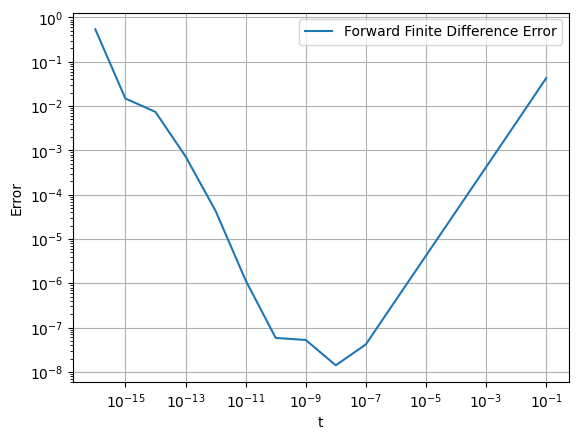

In [237]:
# Define the range of t values
t_values = np.logspace(-16, -1, 16) # between 10^-16 and 10^-1 with 16 points

x = 1
true_derivative = f_1(x)
errors = []

for t in t_values:
    approx_derivative = forward_finite_difference(f, x, t)
    error = abs(approx_derivative - true_derivative)
    errors.append(error)

plt.loglog(t_values, errors, label="Forward Finite Difference Error")
plt.xlabel("t")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

##### 4. Define a function `central_difference` that compute the central difference approximation of the first derivative of a function $f$ at a point $x$. The function `central_difference` must take as input a function $f$, a point $x$ and a level $t$ used to compute the finite difference.

From lecture5 notes we have that Central Difference Formula is $f'(x) = \frac{f(x + t) - f(x - t)}{2t} + \tilde{\delta}(t), \quad |\tilde{\delta}(t)| \leq Lt^2.$


In [238]:
def central_difference(f, x, t):
    return (f(x + t) - f(x - t)) / (2 * t)

##### 5. Compute the estimate of $f'(x)$ at x = 1 using the function `central_difference` for $t = 10^{−16}, 10^{−15} , \dots , 10^{−2}, 10^{−1}$ and compute the approximation error for each $t$. Plot this error versus $t$ in _log-log scale_ and on the same plot, the error of the forward finite difference scheme. Comment the results.

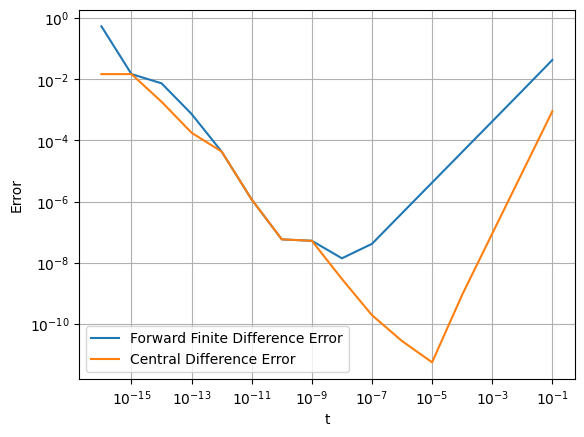

In [239]:
central_errors = []

for t in t_values:
    approx_derivative_central = central_difference(f, x, t)
    error_central = abs(approx_derivative_central - true_derivative)
    central_errors.append(error_central)

# Plot the errors for both forward finite difference and central difference
plt.loglog(t_values, errors, label="Forward Finite Difference Error")
plt.loglog(t_values, central_errors, label="Central Difference Error")
plt.xlabel("t")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

We can notice that the **Central Difference** function provides smaller error (i.e. a better approximation of the derivative) compared to the **Forward Finite Difference** function for a wide range of the given $t$.

This behaviour is expected since the approximation error of **Centrall Difference** is of order $O (t^2)$, which is much smaller than the for the **Forward Difference** (approximation error is of order $O(t)$) since for $t \rightarrow 0$ _(recall from lecture 5 notes_).

However, we can notice that for the smallest values of $t$ the approximation error of both functions is quite big. This is probably due to numerical errors of floating-precision numbers; by fact with very small value of $t$, in both formulas 
$$f'(x) \approx \frac{f(x + t) - f(x)}{t} \text{ for Forward Finite Difference, and } f'(x) \approx \frac{f(x + t) - f(x - t)}{2t} \text{ for Central Difference}$$ 
we result having a subtraction between two factors whome values are nearly identical; this can cause **cancellation errors**, i.e. causing a loss of precision and so increasing the error.